<a href="https://colab.research.google.com/github/ifanirmala/Sentiment-Analysis-Opini-Masyarakat-tentangKDRT-dengan-metode-SVM-NB/blob/main/Sentiment_Analysis_Opini_KDRT_SVM_%26_NB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01 Data Acquisition

In [ ]:
#Import library yang dibutuhkan
import re, string, unicodedata #modul regular expression
import nltk
from nltk import word_tokenize, sent_tokenize #Paket ini membagi teks input menjadi kata-kata.,
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [ ]:
#reading the dataset
data= pd.read_csv('/content/kdrt_1500_data.csv', sep=";", error_bad_lines=False)
data.head(5)

Skipping line 12: expected 16 fields, saw 17
Skipping line 44: expected 16 fields, saw 17
Skipping line 186: expected 16 fields, saw 17
Skipping line 248: expected 16 fields, saw 17
Skipping line 1310: expected 16 fields, saw 17



,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,3229841432,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan ruma...,0,0,0,0,NaN,in,1336288280531255297,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,@tanyakanrl Padahal secara prosesi semua orang...,0,0,0,0,NaN,in,1090402964835946497,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,@NdrewsTjan ambil poin pentingnya aja si mempe...,0,0,0,0,NaN,in,847463960093671424,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis
4,Fri May 19 23:11:27 +0000 2023,1659698311031570400,1659698311031570432,@hellosnzh Krna mental anak ga cuman rusak krn...,0,0,0,0,NaN,in,1279017129807769606,1659385320234958800,1659385320234958851,NaN,NaN,MybelVed


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           1492 non-null   object 
 1   id                   1492 non-null   int64  
 2   id_str               1492 non-null   int64  
 3   full_text            1492 non-null   object 
 4   quote_count          1492 non-null   int64  
 5   reply_count          1492 non-null   int64  
 6   retweet_count        1492 non-null   int64  
 7   favorite_count       1492 non-null   int64  
 8   geo                  0 non-null      float64
 9   lang                 1492 non-null   object 
 10  user_id_str          1492 non-null   int64  
 11  conversation_id      1492 non-null   int64  
 12  conversation_id_str  1492 non-null   int64  
 13  media_url_https      238 non-null    object 
 14  media_type           238 non-null    object 
 15  username             1492 non-null   o

In [ ]:
data['full_text']

0                             @biskichoff Kdrt versi lite
1       kenap akhir akhir ini banyak permasalahan ruma...
2       @tanyakanrl Padahal secara prosesi semua orang...
3       @NdrewsTjan ambil poin pentingnya aja si mempe...
4       @hellosnzh Krna mental anak ga cuman rusak krn...
                              ...                        
1487    @idextratime Ga jaga perasaan 4nton ya si ETI ...
1488    @ratna_gummybear @shadyamala @kegblgnunfaedh M...
1489    Sekolah kalo mau ambil peran mencegah percerai...
1490    Belakangan ini sering sekali dengar berita per...
1491    Angka Pernikahan di Indonesia Menurun, Marakny...
Name: full_text, Length: 1492, dtype: object

In [ ]:
data.columns

Index(['created_at', 'id', 'id_str', 'full_text', 'quote_count', 'reply_count',
       'retweet_count', 'favorite_count', 'geo', 'lang', 'user_id_str',
       'conversation_id', 'conversation_id_str', 'media_url_https',
       'media_type', 'username'],
      dtype='object')

In [ ]:
del(data['created_at'])

In [ ]:
del(data["id"])
del(data["id_str"])
del(data["quote_count"])
del(data['reply_count'])
del(data['retweet_count'])
del(data['favorite_count'])
del(data['geo'])
del(data['lang'])
del(data['user_id_str'])
del(data['conversation_id'])
del(data['conversation_id_str'])
del(data['media_url_https'])
del(data['media_type'])
del(data['username'])

In [ ]:
data

,full_text
0,@biskichoff Kdrt versi lite
1,kenap akhir akhir ini banyak permasalahan ruma...
2,@tanyakanrl Padahal secara prosesi semua orang...
3,@NdrewsTjan ambil poin pentingnya aja si mempe...
4,@hellosnzh Krna mental anak ga cuman rusak krn...
...,...
1487,@idextratime Ga jaga perasaan 4nton ya si ETI ...
1488,@ratna_gummybear @shadyamala @kegblgnunfaedh M...
1489,Sekolah kalo mau ambil peran mencegah percerai...
1490,Belakangan ini sering sekali dengar berita per...


# 02 Text Preprocessing

In [ ]:
!pip install swifter
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 830.9/830.9 kB 12.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.6 MB/s eta 0:00:00
  Created wheel for swifter: filename=swifter-1.3.4-py3-none-any.whl size=16299 sha256=ddd9454aa12a9636e47ac088b96c0346ac84c091e55916f66d1a22bf993456ad
  Stored in directory: /root/.cache/pip/wheels/6c/bd/3e/2d6afc9bc36c9975f8e4215a270bbac6580c4361ebd6bb2323
Successfully built swifter
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import string
import re
import csv
import swifter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

import nltk

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/projek_akhir/Sentimen-Analisis-SVM-main/kdrt_1500_data.csv', sep=';', error_bad_lines=False)

Skipping line 12: expected 16 fields, saw 17
Skipping line 44: expected 16 fields, saw 17
Skipping line 186: expected 16 fields, saw 17
Skipping line 248: expected 16 fields, saw 17
Skipping line 1310: expected 16 fields, saw 17



In [ ]:
print('Dataset size:',df.shape)
print

Dataset size: (1492, 16)


<function print>

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   created_at           1492 non-null   object 
 1   id                   1492 non-null   int64  
 2   id_str               1492 non-null   int64  
 3   full_text            1492 non-null   object 
 4   quote_count          1492 non-null   int64  
 5   reply_count          1492 non-null   int64  
 6   retweet_count        1492 non-null   int64  
 7   favorite_count       1492 non-null   int64  
 8   geo                  0 non-null      float64
 9   lang                 1492 non-null   object 
 10  user_id_str          1492 non-null   int64  
 11  conversation_id      1492 non-null   int64  
 12  conversation_id_str  1492 non-null   int64  
 13  media_url_https      238 non-null    object 
 14  media_type           238 non-null    object 
 15  username             1492 non-null   o

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
#CLEANING TEXT
def remove_punct(text):
    text = re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text)
    text = re.sub(r'^RT[\s]+', '', text)
    text = re.sub('/n', ' ',text)
    text = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+)|(http?://[^\s]+))',' ',text)
    text = re.sub(r' +', ' ',text)
    return text

pd.set_option("display.max_colwidth", -1)
df['FULL_TEXT'] = df['full_text'].apply(lambda x: remove_punct(x))
df.head(5)

,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username,FULL_TEXT
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,3229841432,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance,Kdrt versi lite
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,0,0,0,0,NaN,in,1336288280531255297,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,"@tanyakanrl Padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. Yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.",0,0,0,0,NaN,in,1090402964835946497,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee,Padahal secara prosesi semua orang tau acara nikah itu seperti apa kayak ga perlu perlu amat praktek sampe segininya ngabisin duit Yang perlu ditekankan udah paham belum tanggungjawab hak dan kewajiban dalam pernikahan kalo cerai apa yang harus dilakuin kalo dpt kdrt harus gmn
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,"@NdrewsTjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""",0,0,0,0,NaN,in,847463960093671424,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis,ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah
4,Fri May 19 23:11:27 +0000 2023,1659698311031570400,1659698311031570432,"@hellosnzh Krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus, kdrt, perselingkuhan terus menerus. Itulah mengapa gw bner2 selektif dlm memilih psngan.",0,0,0,0,NaN,in,1279017129807769606,1659385320234958800,1659385320234958851,NaN,NaN,MybelVed,Krna mental anak ga cuman rusak krna perceraian org tau bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus kdrt perselingkuhan terus menerus Itulah mengapa gw bner2 selektif dlm memilih psngan


In [ ]:
#TOKENIZATION

def tokenization(text):
    text = re.split('\W+', text)
    return text

df['TOKENIZATION'] = df['full_text'].apply(lambda x: tokenization(x.lower()))
df.head(5)

,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username,FULL_TEXT,TOKENIZATION
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,3229841432,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance,Kdrt versi lite,"[, biskichoff, kdrt, versi, lite]"
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,0,0,0,0,NaN,in,1336288280531255297,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt,"[kenap, akhir, akhir, ini, banyak, permasalahan, rumah, tangga, kalau, ga, selingkuh, ya, kdrt, ]"
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,"@tanyakanrl Padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. Yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.",0,0,0,0,NaN,in,1090402964835946497,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee,Padahal secara prosesi semua orang tau acara nikah itu seperti apa kayak ga perlu perlu amat praktek sampe segininya ngabisin duit Yang perlu ditekankan udah paham belum tanggungjawab hak dan kewajiban dalam pernikahan kalo cerai apa yang harus dilakuin kalo dpt kdrt harus gmn,"[, tanyakanrl, padahal, secara, prosesi, semua, orang, tau, acara, nikah, itu, seperti, apa, kayak, ga, perlu, perlu, amat, praktek, sampe, segininya, ngabisin, duit, yang, perlu, ditekankan, udah, paham, belum, tanggungjawab, hak, dan, kewajiban, dalam, pernikahan, kalo, cerai, apa, yang, harus, dilakuin, kalo, dpt, kdrt, harus, gmn, ]"
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,"@NdrewsTjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""",0,0,0,0,NaN,in,847463960093671424,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis,ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah,"[, ndrewstjan, ambil, poin, pentingnya, aja, si, mempertahankan, rumah, tangga, dengan, cara, berusaha, menjadi, lebih, baik, dengan, menurunkan, ego, dan, ikut, kelas, parenting, lagian, udah, dibilang, jg, utk, pertahankan, klo, selama, kasus, itu, bkn, kdrt, dan, psgn, mau, berubah, ]"
4,Fri May 19 23:11:27 +0000 2023,1659698311031570400,1659698311031570432,"@hellosnzh Krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus, kdrt, perselingkuhan terus menerus. Itulah mengapa gw bner2 selektif dlm memilih psngan.",0,0,0,0,NaN,in,1279017129807769606,1659385320234958800,1659385320234958851,NaN,NaN,MybelVed,Krna mental anak ga cuman rusak krna perceraian org tau bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus kdrt perselingkuhan terus menerus Itulah mengapa gw bner2 selektif dlm memilih psngan,"[, hellosnzh, krna, mental, anak, ga, cuman, rusak, krna, perceraian, org, tau, bnyak, yg, org, tua, nya, msih, sama2, tapi, mental, anak, rusak, krna, ributnya, org, tua, yg, terus, menerus, kdrt, perselingkuhan, terus, menerus, itulah, mengapa, gw, bner2, selektif, dlm, memilih, psngan, ]"


In [ ]:
#STOPREMOVAL
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('indonesian')


def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text

df['STOP_REMOVAL'] = df['TOKENIZATION'].apply(lambda x: remove_stopwords(x))
df.head(5)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,3229841432,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance,Kdrt versi lite,"[, biskichoff, kdrt, versi, lite]","[, biskichoff, kdrt, versi, lite]"
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,0,0,0,0,NaN,in,1336288280531255297,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt,"[kenap, akhir, akhir, ini, banyak, permasalahan, rumah, tangga, kalau, ga, selingkuh, ya, kdrt, ]","[kenap, permasalahan, rumah, tangga, ga, selingkuh, ya, kdrt, ]"
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,"@tanyakanrl Padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. Yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.",0,0,0,0,NaN,in,1090402964835946497,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee,Padahal secara prosesi semua orang tau acara nikah itu seperti apa kayak ga perlu perlu amat praktek sampe segininya ngabisin duit Yang perlu ditekankan udah paham belum tanggungjawab hak dan kewajiban dalam pernikahan kalo cerai apa yang harus dilakuin kalo dpt kdrt harus gmn,"[, tanyakanrl, padahal, secara, prosesi, semua, orang, tau, acara, nikah, itu, seperti, apa, kayak, ga, perlu, perlu, amat, praktek, sampe, segininya, ngabisin, duit, yang, perlu, ditekankan, udah, paham, belum, tanggungjawab, hak, dan, kewajiban, dalam, pernikahan, kalo, cerai, apa, yang, harus, dilakuin, kalo, dpt, kdrt, harus, gmn, ]","[, tanyakanrl, prosesi, orang, tau, acara, nikah, kayak, ga, praktek, sampe, segininya, ngabisin, duit, ditekankan, udah, paham, tanggungjawab, hak, kewajiban, pernikahan, kalo, cerai, dilakuin, kalo, dpt, kdrt, gmn, ]"
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,"@NdrewsTjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""",0,0,0,0,NaN,in,847463960093671424,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis,ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah,"[, ndrewstjan, ambil, poin, pentingnya, aja, si, mempertahankan, rumah, tangga, dengan, cara, berusaha, menjadi, lebih, baik, dengan, menurunkan, ego, dan, ikut, kelas, parenting, lagian, udah, dibilang, jg, utk, pertahankan, klo, selama, kasus, itu, bkn, kdrt, dan, psgn, mau, berubah, ]","[, ndrewstjan, ambil, poin, aja, si, mempertahankan, rumah, tangga, berusaha, menurunkan, ego, kelas, parenting, udah, dibilang, jg, utk, pertahankan, klo, bkn, kdrt, psgn, berubah, ]"
4,Fri May 19 23:11:27 +0000 2023,1659698311031570400,1659698311031570432,"@hellosnzh Krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus, kdrt, perselingkuhan terus menerus. Itulah mengapa gw bner2 selektif dlm memilih psngan.",0,0,0,0,NaN,in,1279017129807769606,1659385320234958800,1659385320234958851,NaN,NaN,MybelVed,Krna mental anak ga cuman rusak krna perceraian org tau bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus kdrt pe

In [ ]:
#CASE FOLDING
df['FULL_TEXT'] = df['full_text'].str.lower()
df.head(5)

,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,3229841432,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance,@biskichoff kdrt versi lite,"[, biskichoff, kdrt, versi, lite]","[, biskichoff, kdrt, versi, lite]"
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,0,0,0,0,NaN,in,1336288280531255297,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,"[kenap, akhir, akhir, ini, banyak, permasalahan, rumah, tangga, kalau, ga, selingkuh, ya, kdrt, ]","[kenap, permasalahan, rumah, tangga, ga, selingkuh, ya, kdrt, ]"
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,"@tanyakanrl Padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. Yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.",0,0,0,0,NaN,in,1090402964835946497,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee,"@tanyakanrl padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.","[, tanyakanrl, padahal, secara, prosesi, semua, orang, tau, acara, nikah, itu, seperti, apa, kayak, ga, perlu, perlu, amat, praktek, sampe, segininya, ngabisin, duit, yang, perlu, ditekankan, udah, paham, belum, tanggungjawab, hak, dan, kewajiban, dalam, pernikahan, kalo, cerai, apa, yang, harus, dilakuin, kalo, dpt, kdrt, harus, gmn, ]","[, tanyakanrl, prosesi, orang, tau, acara, nikah, kayak, ga, praktek, sampe, segininya, ngabisin, duit, ditekankan, udah, paham, tanggungjawab, hak, kewajiban, pernikahan, kalo, cerai, dilakuin, kalo, dpt, kdrt, gmn, ]"
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,"@NdrewsTjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""",0,0,0,0,NaN,in,847463960093671424,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis,"@ndrewstjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""","[, ndrewstjan, ambil, poin, pentingnya, aja, si, mempertahankan, rumah, tangga, dengan, cara, berusaha, menjadi, lebih, baik, dengan, menurunkan, ego, dan, ikut, kelas, parenting, lagian, udah, dibilang, jg, utk, pertahankan, klo, selama, kasus, itu, bkn, kdrt, dan, psgn, mau, berubah, ]","[, ndrewstjan, ambil, poin, aja, si, mempertahankan, rumah, tangga, berusaha, menurunkan, ego, kelas, parenting, udah, dibilang, jg, utk, pertahankan, klo, bkn, kdrt, psgn, berubah, ]"
4,Fri May 19 23:11:27 +0000 2023,1659698311031570400,1659698311031570432,"@hellosnzh Krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus, kdrt, perselingkuhan terus menerus. Itulah mengapa gw bner2 selektif dlm memilih psngan.",0,0,0,0,NaN,in,1279017129807769606,1659385320234958800,1659385320234958851,NaN,NaN,MybelVed,"@hellosnzh krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi 

In [ ]:
df.head(5)

,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,user_id_str,conversation_id,conversation_id_str,media_url_https,media_type,username,FULL_TEXT,TOKENIZATION,STOP_REMOVAL
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,3229841432,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance,@biskichoff kdrt versi lite,"[, biskichoff, kdrt, versi, lite]","[, biskichoff, kdrt, versi, lite]"
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,0,0,0,0,NaN,in,1336288280531255297,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,"[kenap, akhir, akhir, ini, banyak, permasalahan, rumah, tangga, kalau, ga, selingkuh, ya, kdrt, ]","[kenap, permasalahan, rumah, tangga, ga, selingkuh, ya, kdrt, ]"
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,"@tanyakanrl Padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. Yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.",0,0,0,0,NaN,in,1090402964835946497,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee,"@tanyakanrl padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.","[, tanyakanrl, padahal, secara, prosesi, semua, orang, tau, acara, nikah, itu, seperti, apa, kayak, ga, perlu, perlu, amat, praktek, sampe, segininya, ngabisin, duit, yang, perlu, ditekankan, udah, paham, belum, tanggungjawab, hak, dan, kewajiban, dalam, pernikahan, kalo, cerai, apa, yang, harus, dilakuin, kalo, dpt, kdrt, harus, gmn, ]","[, tanyakanrl, prosesi, orang, tau, acara, nikah, kayak, ga, praktek, sampe, segininya, ngabisin, duit, ditekankan, udah, paham, tanggungjawab, hak, kewajiban, pernikahan, kalo, cerai, dilakuin, kalo, dpt, kdrt, gmn, ]"
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,"@NdrewsTjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""",0,0,0,0,NaN,in,847463960093671424,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis,"@ndrewstjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""","[, ndrewstjan, ambil, poin, pentingnya, aja, si, mempertahankan, rumah, tangga, dengan, cara, berusaha, menjadi, lebih, baik, dengan, menurunkan, ego, dan, ikut, kelas, parenting, lagian, udah, dibilang, jg, utk, pertahankan, klo, selama, kasus, itu, bkn, kdrt, dan, psgn, mau, berubah, ]","[, ndrewstjan, ambil, poin, aja, si, mempertahankan, rumah, tangga, berusaha, menurunkan, ego, kelas, parenting, udah, dibilang, jg, utk, pertahankan, klo, bkn, kdrt, psgn, berubah, ]"
4,Fri May 19 23:11:27 +0000 2023,1659698311031570400,1659698311031570432,"@hellosnzh Krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi mental anak rusak krna ributnya org tua yg terus menerus, kdrt, perselingkuhan terus menerus. Itulah mengapa gw bner2 selektif dlm memilih psngan.",0,0,0,0,NaN,in,1279017129807769606,1659385320234958800,1659385320234958851,NaN,NaN,MybelVed,"@hellosnzh krna mental anak ga cuman rusak krna perceraian org tau, bnyak yg org tua nya msih sama2 tapi 

In [ ]:
stop_removal = df[['STOP_REMOVAL']]

def fit_stopwords(text):
    text = np.array(text)
    text = ' '.join(text)
    return text

df['STOP_REMOVAL'] = df['STOP_REMOVAL'].apply(lambda x: fit_stopwords(x))

In [ ]:
# WORD NORMALIZATION
# Download corpus kumpulan slangwords
!wget https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset//master/kamus_singkatan.csv

--2023-05-26 01:58:10--  https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset//master/kamus_singkatan.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv [following]
--2023-05-26 01:58:10--  https://raw.githubusercontent.com/meisaputri21/Indonesian-Twitter-Emotion-Dataset/master/kamus_singkatan.csv
Reusing existing connection to raw.githubusercontent.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 18911 (18K) [text/plain]
Saving to: ‘kamus_singkatan.csv’

kamus_singkatan.csv 100%[===================>]  18.47K  --.-KB/s    in 0.002s  

2023-05-26 01:58:10 (9.20 MB/s) - ‘kamus_singkatan.csv’ saved [18911/18911]



In [ ]:
# berikut adalah kamus slang words dari Meisa Putri yang saya dapat di github
key_norm = pd.read_csv('kamus_singkatan.csv', sep=';', header=None)
key_norm.columns=['singkat','hasil']
print(key_norm.head())

key_norm.shape

   singkat     hasil
0  aamiin   amin    
1  adek     adik    
2  adlh     adalah  
3  aer      air     
4  aiskrim  es krim 


(1309, 2)

In [ ]:
# buat fungsi text normalize untuk mengubah kata singkat/kata tak baku menjadi kata baku
def text_normalize(text):
  text = ' '.join([key_norm[key_norm['singkat'] == word]['hasil'].values[0] if (key_norm['singkat'] == word).any() else word for word in text.split()])
  text = str.lower(text)
  return text

In [ ]:
df['normalization'] = df['STOP_REMOVAL'].apply(lambda x: text_normalize(x))

In [ ]:
#STEMMING
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(text):
    return stemmer.stem(text)

df['STEMMING'] = df['normalization'].apply(lambda x: stemming(x))
df.head(5)

,created_at,id,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,geo,lang,...,conversation_id,conversation_id_str,media_url_https,media_type,username,FULL_TEXT,TOKENIZATION,STOP_REMOVAL,normalization,STEMMING
0,Fri May 19 23:45:35 +0000 2023,1659706898927734800,1659706898927734784,@biskichoff Kdrt versi lite,0,1,0,0,NaN,in,...,1659706284038557700,1659706284038557696,NaN,NaN,__Forbearance,@biskichoff kdrt versi lite,"[, biskichoff, kdrt, versi, lite]",biskichoff kdrt versi lite,biskichoff kdrt versi lite,biskichoff kdrt versi lite
1,Fri May 19 23:07:26 +0000 2023,1659697298023252000,1659697298023251969,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,0,0,0,0,NaN,in,...,1659697298023252000,1659697298023251969,NaN,NaN,Sdstnur22,kenap akhir akhir ini banyak permasalahan rumah tangga kalau ga selingkuh ya kdrt 🫤,"[kenap, akhir, akhir, ini, banyak, permasalahan, rumah, tangga, kalau, ga, selingkuh, ya, kdrt, ]",kenap permasalahan rumah tangga ga selingkuh ya kdrt,kenap permasalahan rumah tangga tidak selingkuh ya kdrt,kenap masalah rumah tangga tidak selingkuh ya kdrt
2,Fri May 19 23:05:42 +0000 2023,1659696861903728600,1659696861903728642,"@tanyakanrl Padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. Yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.",0,0,0,0,NaN,in,...,1659433716471697400,1659433716471697410,NaN,NaN,ownlyymee,"@tanyakanrl padahal secara prosesi semua orang tau acara nikah itu seperti apa, kayak ga perlu-perlu amat praktek sampe segininya ngabisin duit. yang perlu ditekankan udah paham belum tanggungjawab,hak,dan kewajiban dalam pernikahan,kalo cerai apa yang harus dilakuin,kalo dpt kdrt harus gmn.","[, tanyakanrl, padahal, secara, prosesi, semua, orang, tau, acara, nikah, itu, seperti, apa, kayak, ga, perlu, perlu, amat, praktek, sampe, segininya, ngabisin, duit, yang, perlu, ditekankan, udah, paham, belum, tanggungjawab, hak, dan, kewajiban, dalam, pernikahan, kalo, cerai, apa, yang, harus, dilakuin, kalo, dpt, kdrt, harus, gmn, ]",tanyakanrl prosesi orang tau acara nikah kayak ga praktek sampe segininya ngabisin duit ditekankan udah paham tanggungjawab hak kewajiban pernikahan kalo cerai dilakuin kalo dpt kdrt gmn,tanyakanrl prosesi orang tahu acara nikah mirip tidak praktik sampai segininya ngabisin duit ditekankan sudah paham tanggungjawab hak kewajiban pernikahan kalau cerai dilakuin kalau dapat kdrt bagaimana,tanyakanrl prosesi orang tahu acara nikah mirip tidak praktik sampai gin ngabisin duit tekan sudah paham tanggungjawab hak wajib nikah kalau cerai dilakuin kalau dapat kdrt bagaimana
3,Fri May 19 23:48:29 +0000 2023,1659707631785869300,1659707631785869314,"@NdrewsTjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". Lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""",0,0,0,0,NaN,in,...,1658772518034096000,1658772518034096128,NaN,NaN,oh_katarsis,"@ndrewstjan ambil poin pentingnya aja si mempertahankan rumah tangga dengan cara berusaha menjadi lebih baik dengan menurunkan ego dan ikut kelas parenting"". lagian udah dibilang jg utk pertahankan klo selama kasus itu bkn kdrt dan psgn mau berubah.""","[, ndrewstjan, ambil, poin, pentingnya, aja, si, mempertahankan, rumah, tangga, dengan, cara, berusaha, menjadi, lebih, baik, dengan, menurunkan, ego, dan, ikut, kelas, parenting, lagian, udah, dibilang, jg, utk, pertahankan, klo, selama, kasus, itu, bkn, kdrt, dan, psgn, mau, berubah, ]",ndrewstjan ambil poin aja si mempertahankan rumah tangga berusaha menurunkan ego kelas parenting udah dibilang jg utk pertahankan klo bkn kdrt psgn berubah,ndrewstjan ambil poin saja si mempertahankan rumah tangga berusaha menurunkan ego kelas parenting sudah

In [ ]:
df = df['STEMMING']
df.head(5)

0    biskichoff kdrt versi lite                                                                                                                                                                                                  
1    kenap masalah rumah tangga tidak selingkuh ya kdrt                                                                                                                                                                          
2    tanyakanrl prosesi orang tahu acara nikah mirip tidak praktik sampai gin ngabisin duit tekan sudah paham tanggungjawab hak wajib nikah kalau cerai dilakuin kalau dapat kdrt bagaimana                                      
3    ndrewstjan ambil poin saja si tahan rumah tangga usaha turun ego kelas parenting sudah bilang juga untuk tahan kalau bukan kdrt psgn ubah                                                                                   
4    hellosnzh karena mental anak tidak hanya rusak karena cerai orang tahu banyak yang orang tu

In [ ]:
df.to_csv('HASIL3.csv', index = False)

# LEXICON MODEL

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
# download kamus lexicon
!wget https://raw.githubusercontent.com/rifkyahmadsaputra/Sentiment-Analysis-Online-Lectures-in-Indonesia/main/data/lexicon_negative.csv
!wget https://raw.githubusercontent.com/rifkyahmadsaputra/Sentiment-Analysis-Online-Lectures-in-Indonesia/main/data/lexicon_positive.csv

--2023-05-26 02:09:24--  https://raw.githubusercontent.com/rifkyahmadsaputra/Sentiment-Analysis-Online-Lectures-in-Indonesia/main/data/lexicon_negative.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82684 (81K) [text/plain]
Saving to: ‘lexicon_negative.csv’

lexicon_negative.cs 100%[===================>]  80.75K  --.-KB/s    in 0.01s   

2023-05-26 02:09:24 (5.94 MB/s) - ‘lexicon_negative.csv’ saved [82684/82684]

--2023-05-26 02:09:24--  https://raw.githubusercontent.com/rifkyahmadsaputra/Sentiment-Analysis-Online-Lectures-in-Indonesia/main/data/lexicon_positive.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])

# Function to determine sentiment polarity of tweets
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
    for word in text:
        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
    polarity=''
    if (score > 0):
        polarity = 1
    elif (score < 0):
        polarity = -1
    else:
        polarity = 0
    return score, polarity

In [ ]:
data = pd.read_csv('/content/HASIL3.csv')

In [ ]:
data

,STEMMING
0,biskichoff kdrt versi lite
1,kenap masalah rumah tangga tidak selingkuh ya kdrt
2,tanyakanrl prosesi orang tahu acara nikah mirip tidak praktik sampai gin ngabisin duit tekan sudah paham tanggungjawab hak wajib nikah kalau cerai dilakuin kalau dapat kdrt bagaimana
3,ndrewstjan ambil poin saja si tahan rumah tangga usaha turun ego kelas parenting sudah bilang juga untuk tahan kalau bukan kdrt psgn ubah
4,hellosnzh karena mental anak tidak hanya rusak karena cerai orang tahu banyak yang orang tua nya masih sama2 mental anak rusak karena ribut orang tua yang terus kdrt selingkuh terus saya bner2 selektif dalam pilih psngan
...,...
1487,idextratime tidak jaga asa 4nton ya si eti bahaya et cerai kamu tidak usah ikut2 an runyam nanti an
1488,ratna gummybear shadyamala kegblgnunfaedh maksud tidak komentar hal2 yang belum tahu sebab cerai doi takut fitnah sih
1489,sekolah kalau ambil peran cegah cerai lho ajar esensi meni pesta akad janji nikah n nkuatkan paham tentang akad konsekuensi yang paham akad dan lain n nbiar nanti gede tidak gampang ngucap janji paham konsekuensi
1490,dengar berita selingkuh cerai n nsebuah utas https t co 5vk7bvzihz


In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
data['STEMMING'] =pd.Series(data['STEMMING'],dtype="string")

In [ ]:
data['STEMMING'] = data['STEMMING'].replace(np.nan, '')

In [ ]:
data['tokenized_sents'] = data.apply(lambda row: word_tokenize(row['STEMMING']), axis=1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   STEMMING         1492 non-null   string
 1   tokenized_sents  1492 non-null   object
dtypes: object(1), string(1)
memory usage: 23.4+ KB


In [ ]:
results = data['tokenized_sents'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
data['polarity_score'] = results[0]
data['polarity'] = results[1]
print(data['polarity'].value_counts())

-1    1145
 1    189 
 0    158 
Name: polarity, dtype: int64


In [ ]:
data

,STEMMING,tokenized_sents,polarity_score,polarity
0,biskichoff kdrt versi lite,"[biskichoff, kdrt, versi, lite]",0,0
1,kenap masalah rumah tangga tidak selingkuh ya kdrt,"[kenap, masalah, rumah, tangga, tidak, selingkuh, ya, kdrt]",-14,-1
2,tanyakanrl prosesi orang tahu acara nikah mirip tidak praktik sampai gin ngabisin duit tekan sudah paham tanggungjawab hak wajib nikah kalau cerai dilakuin kalau dapat kdrt bagaimana,"[tanyakanrl, prosesi, orang, tahu, acara, nikah, mirip, tidak, praktik, sampai, gin, ngabisin, duit, tekan, sudah, paham, tanggungjawab, hak, wajib, nikah, kalau, cerai, dilakuin, kalau, dapat, kdrt, bagaimana]",-19,-1
3,ndrewstjan ambil poin saja si tahan rumah tangga usaha turun ego kelas parenting sudah bilang juga untuk tahan kalau bukan kdrt psgn ubah,"[ndrewstjan, ambil, poin, saja, si, tahan, rumah, tangga, usaha, turun, ego, kelas, parenting, sudah, bilang, juga, untuk, tahan, kalau, bukan, kdrt, psgn, ubah]",-19,-1
4,hellosnzh karena mental anak tidak hanya rusak karena cerai orang tahu banyak yang orang tua nya masih sama2 mental anak rusak karena ribut orang tua yang terus kdrt selingkuh terus saya bner2 selektif dalam pilih psngan,"[hellosnzh, karena, mental, anak, tidak, hanya, rusak, karena, cerai, orang, tahu, banyak, yang, orang, tua, nya, masih, sama2, mental, anak, rusak, karena, ribut, orang, tua, yang, terus, kdrt, selingkuh, terus, saya, bner2, selektif, dalam, pilih, psngan]",-51,-1
...,...,...,...,...
1487,idextratime tidak jaga asa 4nton ya si eti bahaya et cerai kamu tidak usah ikut2 an runyam nanti an,"[idextratime, tidak, jaga, asa, 4nton, ya, si, eti, bahaya, et, cerai, kamu, tidak, usah, ikut2, an, runyam, nanti, an]",-31,-1
1488,ratna gummybear shadyamala kegblgnunfaedh maksud tidak komentar hal2 yang belum tahu sebab cerai doi takut fitnah sih,"[ratna, gummybear, shadyamala, kegblgnunfaedh, maksud, tidak, komentar, hal2, yang, belum, tahu, sebab, cerai, doi, takut, fitnah, sih]",-20,-1
1489,sekolah kalau ambil peran cegah cerai lho ajar esensi meni pesta akad janji nikah n nkuatkan paham tentang akad konsekuensi yang paham akad dan lain n nbiar nanti gede tidak gampang ngucap janji paham konsekuensi,"[sekolah, kalau, ambil, peran, cegah, cerai, lho, ajar, esensi, meni, pesta, akad, janji, nikah, n, nkuatkan, paham, tentang, akad, konsekuensi, yang, paham, akad, dan, lain, n, nbiar, nanti, gede, tidak, gampang, ngucap, janji, paham, konsekuensi]",-26,-1
1490,dengar berita selingkuh cerai n nsebuah utas https t co 5vk7bvzihz,"[dengar, berita, selingkuh, cerai, n, nsebuah, utas, https, t, co, 5vk7bvzihz]",-7,-1


In [ ]:
# Export to csv file
data.to_csv(r'data_label.csv', index = False, header = True,index_label=None)

data

,STEMMING,tokenized_sents,polarity_score,polarity
0,biskichoff kdrt versi lite,"[biskichoff, kdrt, versi, lite]",0,0
1,kenap masalah rumah tangga tidak selingkuh ya kdrt,"[kenap, masalah, rumah, tangga, tidak, selingkuh, ya, kdrt]",-14,-1
2,tanyakanrl prosesi orang tahu acara nikah mirip tidak praktik sampai gin ngabisin duit tekan sudah paham tanggungjawab hak wajib nikah kalau cerai dilakuin kalau dapat kdrt bagaimana,"[tanyakanrl, prosesi, orang, tahu, acara, nikah, mirip, tidak, praktik, sampai, gin, ngabisin, duit, tekan, sudah, paham, tanggungjawab, hak, wajib, nikah, kalau, cerai, dilakuin, kalau, dapat, kdrt, bagaimana]",-19,-1
3,ndrewstjan ambil poin saja si tahan rumah tangga usaha turun ego kelas parenting sudah bilang juga untuk tahan kalau bukan kdrt psgn ubah,"[ndrewstjan, ambil, poin, saja, si, tahan, rumah, tangga, usaha, turun, ego, kelas, parenting, sudah, bilang, juga, untuk, tahan, kalau, bukan, kdrt, psgn, ubah]",-19,-1
4,hellosnzh karena mental anak tidak hanya rusak karena cerai orang tahu banyak yang orang tua nya masih sama2 mental anak rusak karena ribut orang tua yang terus kdrt selingkuh terus saya bner2 selektif dalam pilih psngan,"[hellosnzh, karena, mental, anak, tidak, hanya, rusak, karena, cerai, orang, tahu, banyak, yang, orang, tua, nya, masih, sama2, mental, anak, rusak, karena, ribut, orang, tua, yang, terus, kdrt, selingkuh, terus, saya, bner2, selektif, dalam, pilih, psngan]",-51,-1
...,...,...,...,...
1487,idextratime tidak jaga asa 4nton ya si eti bahaya et cerai kamu tidak usah ikut2 an runyam nanti an,"[idextratime, tidak, jaga, asa, 4nton, ya, si, eti, bahaya, et, cerai, kamu, tidak, usah, ikut2, an, runyam, nanti, an]",-31,-1
1488,ratna gummybear shadyamala kegblgnunfaedh maksud tidak komentar hal2 yang belum tahu sebab cerai doi takut fitnah sih,"[ratna, gummybear, shadyamala, kegblgnunfaedh, maksud, tidak, komentar, hal2, yang, belum, tahu, sebab, cerai, doi, takut, fitnah, sih]",-20,-1
1489,sekolah kalau ambil peran cegah cerai lho ajar esensi meni pesta akad janji nikah n nkuatkan paham tentang akad konsekuensi yang paham akad dan lain n nbiar nanti gede tidak gampang ngucap janji paham konsekuensi,"[sekolah, kalau, ambil, peran, cegah, cerai, lho, ajar, esensi, meni, pesta, akad, janji, nikah, n, nkuatkan, paham, tentang, akad, konsekuensi, yang, paham, akad, dan, lain, n, nbiar, nanti, gede, tidak, gampang, ngucap, janji, paham, konsekuensi]",-26,-1
1490,dengar berita selingkuh cerai n nsebuah utas https t co 5vk7bvzihz,"[dengar, berita, selingkuh, cerai, n, nsebuah, utas, https, t, co, 5vk7bvzihz]",-7,-1


# Wordcloud

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
sns.set(style = 'whitegrid')

In [ ]:
# load data berlabel
data = pd.read_csv('data_label.csv')

In [ ]:
data

,STEMMING,tokenized_sents,polarity_score,polarity
0,biskichoff kdrt versi lite,"['biskichoff', 'kdrt', 'versi', 'lite']",0,0
1,kenap masalah rumah tangga tidak selingkuh ya ...,"['kenap', 'masalah', 'rumah', 'tangga', 'tidak...",-14,-1
2,tanyakanrl prosesi orang tahu acara nikah miri...,"['tanyakanrl', 'prosesi', 'orang', 'tahu', 'ac...",-19,-1
3,ndrewstjan ambil poin saja si tahan rumah tang...,"['ndrewstjan', 'ambil', 'poin', 'saja', 'si', ...",-19,-1
4,hellosnzh karena mental anak tidak hanya rusak...,"['hellosnzh', 'karena', 'mental', 'anak', 'tid...",-51,-1
...,...,...,...,...
1487,idextratime tidak jaga asa 4nton ya si eti bah...,"['idextratime', 'tidak', 'jaga', 'asa', '4nton...",-31,-1
1488,ratna gummybear shadyamala kegblgnunfaedh maks...,"['ratna', 'gummybear', 'shadyamala', 'kegblgnu...",-20,-1
1489,sekolah kalau ambil peran cegah cerai lho ajar...,"['sekolah', 'kalau', 'ambil', 'peran', 'cegah'...",-26,-1
1490,dengar berita selingkuh cerai n nsebuah utas h...,"['dengar', 'berita', 'selingkuh', 'cerai', 'n'...",-7,-1


In [ ]:
#define negative and positive
negatif = data.loc[data['polarity'] == -1]
positif  = data.loc[data['polarity'] == 1]
netral = data.loc[data['polarity'] == 0]

In [ ]:
all_ = "".join(data.tokenized_sents.values) # untuk semua kata
all_negatif = "".join(negatif.tokenized_sents.values) # untuk kata negatif
all_positif = "".join(positif.tokenized_sents.values) # untuk kata positif
all_netral = "".join(netral.tokenized_sents.values) # untuk kata netral

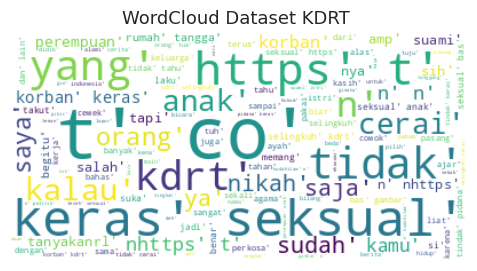

In [ ]:
# word cloud untuk semua kata
cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(all_)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Dataset KDRT ', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

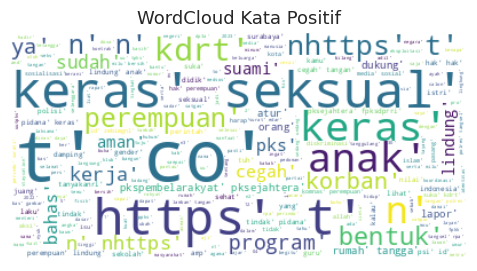

In [ ]:
# word cloud untuk kata positif
cloud = WordCloud(background_color = "white", max_words = 500, stopwords = set(STOPWORDS)).generate(all_positif)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Positif', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

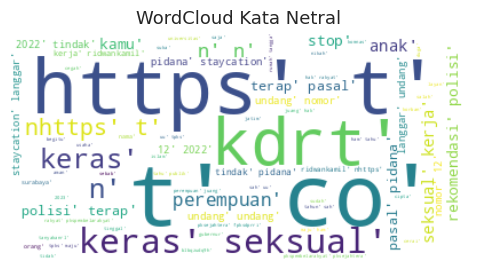

In [ ]:
# word cloud untukkata netral
cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(all_netral)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Netral', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

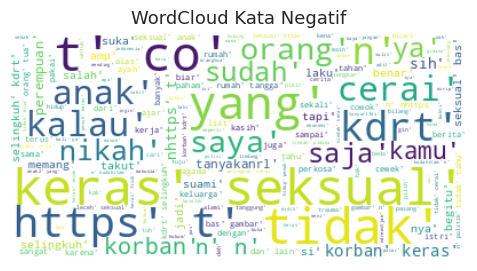

In [ ]:
# word cloud untukkata negative
cloud = WordCloud(background_color = "white", max_words = 500, stopwords = set(STOPWORDS)).generate(all_negatif)
fig, ax = plt.subplots(figsize = (5, 4))
ax.set_title('WordCloud Kata Negatif', fontsize = 13)
ax.grid(False)
ax.imshow(cloud, interpolation='bilinear')
fig.tight_layout(pad=0)
ax.axis('off')
plt.show()

# PENGUJIAN SVM

In [ ]:
!pip install Sastrawi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 9.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold, ShuffleSplit
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
data = pd.read_csv('data_label.csv', encoding='latin-1' )

In [ ]:
data

,STEMMING,tokenized_sents,polarity_score,polarity
0,biskichoff kdrt versi lite,"['biskichoff', 'kdrt', 'versi', 'lite']",0,0
1,kenap masalah rumah tangga tidak selingkuh ya ...,"['kenap', 'masalah', 'rumah', 'tangga', 'tidak...",-14,-1
2,tanyakanrl prosesi orang tahu acara nikah miri...,"['tanyakanrl', 'prosesi', 'orang', 'tahu', 'ac...",-19,-1
3,ndrewstjan ambil poin saja si tahan rumah tang...,"['ndrewstjan', 'ambil', 'poin', 'saja', 'si', ...",-19,-1
4,hellosnzh karena mental anak tidak hanya rusak...,"['hellosnzh', 'karena', 'mental', 'anak', 'tid...",-51,-1
...,...,...,...,...
1487,idextratime tidak jaga asa 4nton ya si eti bah...,"['idextratime', 'tidak', 'jaga', 'asa', '4nton...",-31,-1
1488,ratna gummybear shadyamala kegblgnunfaedh maks...,"['ratna', 'gummybear', 'shadyamala', 'kegblgnu...",-20,-1
1489,sekolah kalau ambil peran cegah cerai lho ajar...,"['sekolah', 'kalau', 'ambil', 'peran', 'cegah'...",-26,-1
1490,dengar berita selingkuh cerai n nsebuah utas h...,"['dengar', 'berita', 'selingkuh', 'cerai', 'n'...",-7,-1


In [ ]:
data.describe()

,polarity_score,polarity
count,1492.000000,1492.000000
mean,-9.726542,-0.640751
std,11.945899,0.695604
min,-77.000000,-1.000000
25%,-16.000000,-1.000000
50%,-7.000000,-1.000000
75%,-1.000000,-1.000000
max,17.000000,1.000000


In [ ]:
data.isna().sum()

STEMMING           11
tokenized_sents     0
polarity_score      0
polarity            0
dtype: int64

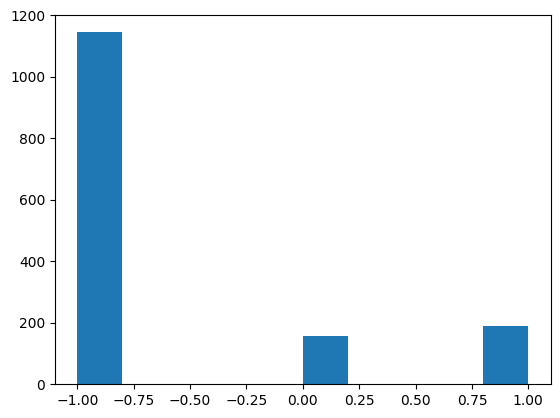

In [ ]:
plt.hist(data.polarity)
plt.show()

In [ ]:
data.polarity.value_counts()

-1    1145
 1     189
 0     158
Name: polarity, dtype: int64

In [ ]:
df = data[['STEMMING','polarity']]
df.head()

,STEMMING,polarity
0,biskichoff kdrt versi lite,0
1,kenap masalah rumah tangga tidak selingkuh ya ...,-1
2,tanyakanrl prosesi orang tahu acara nikah miri...,-1
3,ndrewstjan ambil poin saja si tahan rumah tang...,-1
4,hellosnzh karena mental anak tidak hanya rusak...,-1


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['STEMMING'],df['polarity'],
                                                                    test_size=0.2,random_state=0)
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['STEMMING'].values.astype('U'))
Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))

In [ ]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['STEMMING'],df['polarity'],test_size=0.2, random_state=0)

In [ ]:
Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [ ]:
Test_Y

array([2, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 2, 2, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 2, 0, 0, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 2,
       2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 2, 1, 2, 0, 0, 0, 1, 2, 2, 0, 0, 2, 2, 2,
       2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 0, 1, 0, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 1,
       2, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 1])

<h1>TF-IDF</h1>

In [ ]:
Train_X

465     pas sma teman saya yang cerita orang tua ribut...
764      keras seksual bas gambar n n kudahitam n politik
842     5 lindung anak keras seksual era digital https...
1347    rumit at least ini dokter satu2nya selamat cew...
425     tanyakanrl istri malu suami halayak netizen de...
                              ...                        
763      keras seksual bas gambar n n kudahitam n politik
835     komisioner komnas ham abis hidayat uu tpks dor...
1216    hidup penuh keras hati bawa dalam hidup sejahtera
559     diri center for indonesia s strategic developm...
684     keras seksual tawar tawar media posisi korban ...
Name: STEMMING, Length: 1193, dtype: object

In [ ]:
Tfidf_vect = TfidfVectorizer()
Tfidf_vect.fit(df['STEMMING'].values.astype('U'))

Train_X_Tfidf = Tfidf_vect.transform(Train_X.values.astype('U'))
Test_X_Tfidf = Tfidf_vect.transform(Test_X.values.astype('U'))

In [ ]:
Train_X_Tfidf.shape

(1193, 5834)

In [ ]:
Train_Y.shape

(1193,)

In [ ]:
print("TF-IDF ", type(Test_X_Tfidf), Train_X_Tfidf.shape)

TF-IDF  <class 'scipy.sparse._csr.csr_matrix'> (1193, 5834)


In [ ]:
SVM = SVC()
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10)

array([0.80833333, 0.825     , 0.8       , 0.79831933, 0.78991597,
       0.78991597, 0.80672269, 0.78991597, 0.82352941, 0.84033613])

In [ ]:
cross_val_score(SVM,Train_X_Tfidf,Train_Y, cv=10).mean()

0.8071988795518207

<h1>Membandingkan Kernel</h1>
<h2>1.Linear</h2>

In [ ]:
clf = SVC(kernel='linear', C=2.33)
clf.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='linear')

In [ ]:
scores = cross_val_score(clf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(clf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.85833333 0.85833333 0.825      0.81512605 0.82352941 0.84033613
 0.8487395  0.82352941 0.8487395  0.86554622]
K-Fold Mean ->  0.8407212885154062


In [ ]:
y_pred = clf.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[213   1   6]
 [ 15  17   1]
 [ 28   1  17]]
SVM Accuracy Score ->  82.6086956521739
SVM Recall Score ->  82.6086956521739
SVM Precision Score ->  82.6086956521739
SVM f1 Score ->  82.6086956521739


<h2>2.Polynomial</h2>

In [ ]:
poly = SVC(kernel='poly', C=2.33)
poly.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.33, kernel='poly')

In [ ]:
scores = cross_val_score(poly, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(poly,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.83333333 0.83333333 0.80833333 0.79831933 0.78991597 0.79831933
 0.80672269 0.79831933 0.83193277 0.84033613]
K-Fold Mean ->  0.8138865546218488


In [ ]:
y_pred = poly.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[218   0   2]
 [ 20  13   0]
 [ 37   0   9]]
SVM Accuracy Score ->  80.2675585284281
SVM Recall Score ->  80.2675585284281
SVM Precision Score ->  80.2675585284281
SVM f1 Score ->  80.2675585284281


<h2>3.Radial Basis Function</h2>

In [ ]:
rbf = SVC(kernel='rbf', C=2.13, gamma=0.50 )
rbf.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.13, gamma=0.5)

In [ ]:
scores = cross_val_score(rbf, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(rbf,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.84166667 0.84166667 0.83333333 0.81512605 0.81512605 0.82352941
 0.83193277 0.80672269 0.84033613 0.86554622]
K-Fold Mean ->  0.8314985994397759


In [ ]:
y_pred = rbf.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[217   0   3]
 [ 19  13   1]
 [ 32   0  14]]
SVM Accuracy Score ->  81.60535117056857
SVM Recall Score ->  81.60535117056857
SVM Precision Score ->  81.60535117056857
SVM f1 Score ->  81.60535117056857


<h2>4.Sigmoid</h2>

In [ ]:
sig = SVC(kernel='sigmoid', C=2.25)
sig.fit(Train_X_Tfidf,Train_Y)

SVC(C=2.25, kernel='sigmoid')

In [ ]:
scores = cross_val_score(sig, Train_X_Tfidf, Train_Y, cv=10)
print(scores)
print("K-Fold Mean -> ",cross_val_score(sig,Train_X_Tfidf,Train_Y, cv=10).mean())

[0.83333333 0.85       0.81666667 0.79831933 0.83193277 0.83193277
 0.83193277 0.83193277 0.84033613 0.8487395 ]
K-Fold Mean ->  0.8315126050420167


In [ ]:
y_pred = sig.predict(Test_X_Tfidf)

In [ ]:
print(confusion_matrix(Test_Y, y_pred))
print("SVM Accuracy Score -> ",accuracy_score(y_pred, Test_Y)*100)
print("SVM Recall Score -> ",recall_score(y_pred, Test_Y, average='micro')*100)
print("SVM Precision Score -> ",precision_score(y_pred, Test_Y, average='micro')*100)
print("SVM f1 Score -> ",f1_score(y_pred, Test_Y, average='micro')*100)

[[215   0   5]
 [ 16  16   1]
 [ 28   0  18]]
SVM Accuracy Score ->  83.27759197324414
SVM Recall Score ->  83.27759197324414
SVM Precision Score ->  83.27759197324414
SVM f1 Score ->  83.27759197324414


In [ ]:
def classify(tweet):
    pred  = clf.predict(Tfidf_vect.transform([tweet]))
    if pred == 1:
        return "Sentimen positif"
    elif pred == -1:
        return "Sentimen negatif"
    else :
        return "Sentimen netral"

In [ ]:
classify('kdrt sudah biasa dalam rumah tangga')

'Sentimen netral'

In [ ]:
classify('hilangkan kdrt')

'Sentimen positif'

In [ ]:
classify ('kdrt sama dengan perang dunia ke3')

'Sentimen netral'

# Pengujian Naive Bayes

## 1. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

c = Train_X_Tfidf.toarray()

GNB = GaussianNB()
GNB.fit(c,Train_Y)

GaussianNB()

In [ ]:
cv = ShuffleSplit(n_splits=10)

cv_accuracy = (cross_val_score(GNB,c,Train_Y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.84166667 0.8        0.83333333 0.83333333 0.80833333 0.83333333
 0.81666667 0.78333333 0.80833333 0.78333333] 

Rata-rata akurasi pada cross validation: 0.8141666666666667


In [ ]:
d = Test_X_Tfidf.toarray()

In [ ]:
%%time
GNB_pred= GNB.predict(d)
accuracy_GNB = accuracy_score(Test_Y, GNB_pred)
print(accuracy_GNB)

0.802675585284281
CPU times: user 47.6 ms, sys: 25.7 ms, total: 73.3 ms
Wall time: 239 ms


In [ ]:
# confusion Matrix
cm = confusion_matrix(Test_Y, GNB_pred)
print('Confusion matrix:\n', cm)
print('Classification report:\n', classification_report(Test_Y, GNB_pred))

print('micro Average :')
print("GaussianNB Recall Score -> ",recall_score(Test_Y, GNB_pred, average='micro')*100)
print("GaussianNB Precision Score -> ",precision_score(Test_Y, GNB_pred, average='micro')*100)
print("GaussianNB f1 Score -> ",f1_score(Test_Y, GNB_pred, average='micro')*100)

Confusion matrix:
 [[203   6  11]
 [  8  23   2]
 [ 28   4  14]]
Classification report:
               precision    recall  f1-score   support

           0       0.85      0.92      0.88       220
           1       0.70      0.70      0.70        33
           2       0.52      0.30      0.38        46

    accuracy                           0.80       299
   macro avg       0.69      0.64      0.66       299
weighted avg       0.78      0.80      0.79       299

micro Average :
GaussianNB Recall Score ->  80.2675585284281
GaussianNB Precision Score ->  80.2675585284281
GaussianNB f1 Score ->  80.2675585284281


## Multinominal Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
MNB = MultinomialNB()
MNB.fit(Train_X_Tfidf,Train_Y)

MultinomialNB()

In [ ]:
cv = ShuffleSplit(n_splits=10)

cv_accuracy = (cross_val_score(MNB, Train_X_Tfidf,Train_Y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.74166667 0.75       0.78333333 0.84166667 0.80833333 0.76666667
 0.75       0.75       0.81666667 0.71666667] 

Rata-rata akurasi pada cross validation: 0.7725


In [ ]:
%%time
MNB_pred= MNB.predict(Test_X_Tfidf)
accuracy_MNB = accuracy_score(Test_Y, MNB_pred)
print(accuracy_MNB)

0.7525083612040134
CPU times: user 1.34 ms, sys: 45 µs, total: 1.38 ms
Wall time: 1.39 ms


In [ ]:
cm = confusion_matrix(Test_Y, MNB_pred)
print('Confusion matrix:\n', cm)
print('Classification report:\n', classification_report(Test_Y, MNB_pred))

print('micro Average :')
print("MultinominalNB Recall Score -> ",recall_score(Test_Y, MNB_pred, average='micro')*100)
print("MultinominalNB Precision Score -> ",precision_score(Test_Y, MNB_pred, average='micro')*100)
print("MultinominalNB f1 Score -> ",f1_score(Test_Y, MNB_pred, average='micro')*100)

Confusion matrix:
 [[220   0   0]
 [ 29   4   0]
 [ 45   0   1]]
Classification report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86       220
           1       1.00      0.12      0.22        33
           2       1.00      0.02      0.04        46

    accuracy                           0.75       299
   macro avg       0.92      0.38      0.37       299
weighted avg       0.81      0.75      0.66       299

micro Average :
MultinominalNB Recall Score ->  75.25083612040135
MultinominalNB Precision Score ->  75.25083612040135
MultinominalNB f1 Score ->  75.25083612040135


## Bernoulli Naive Bayes

In [ ]:
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB()
BNB.fit(Train_X_Tfidf,Train_Y)

BernoulliNB()

In [ ]:
cv = ShuffleSplit(n_splits=10)

cv_accuracy = (cross_val_score(BNB, Train_X_Tfidf,Train_Y, cv=cv, scoring='accuracy'))
avg_accuracy = np.mean(cv_accuracy)

print('Akurasi setiap split:', cv_accuracy, '\n')
print('Rata-rata akurasi pada cross validation:', avg_accuracy)

Akurasi setiap split: [0.80833333 0.85833333 0.76666667 0.79166667 0.75833333 0.83333333
 0.825      0.78333333 0.775      0.80833333] 

Rata-rata akurasi pada cross validation: 0.8008333333333333


In [ ]:
%%time
BNB_pred= BNB.predict(Test_X_Tfidf)
accuracy_BNB = accuracy_score(Test_Y, BNB_pred)
print(accuracy_BNB)

0.7324414715719063
CPU times: user 4.61 ms, sys: 0 ns, total: 4.61 ms
Wall time: 5.89 ms


In [ ]:
cm = confusion_matrix(Test_Y, BNB_pred)
print('Confusion matrix:\n', cm)




print('Classification report:\n', classification_report(Test_Y, BNB_pred))

print('micro Average :')
print("BernoulliNB Recall Score -> ",recall_score(Test_Y, BNB_pred, average='micro')*100)
print("BernoulliNB Precision Score -> ",precision_score(Test_Y, BNB_pred, average='micro')*100)
print("BernoulliNB f1 Score -> ",f1_score(Test_Y, BNB_pred, average='micro')*100)

Confusion matrix:
 [[217   0   3]
 [ 33   0   0]
 [ 44   0   2]]
Classification report:
               precision    recall  f1-score   support

           0       0.74      0.99      0.84       220
           1       0.00      0.00      0.00        33
           2       0.40      0.04      0.08        46

    accuracy                           0.73       299
   macro avg       0.38      0.34      0.31       299
weighted avg       0.60      0.73      0.63       299

micro Average :
BernoulliNB Recall Score ->  73.24414715719062
BernoulliNB Precision Score ->  73.24414715719062
BernoulliNB f1 Score ->  73.24414715719062


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print('Akurasi Naive Bayes :\n')
print('Gaussian Naive Bayes : ',accuracy_GNB )
print('Multinominal Naive Bayes : ',accuracy_MNB )
print('Bernoulli Naive Bayes : ',accuracy_BNB )

Akurasi Naive Bayes :

Gaussian Naive Bayes :  0.802675585284281
Multinominal Naive Bayes :  0.7525083612040134
Bernoulli Naive Bayes :  0.7324414715719063
